The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Project root: /Users/david/Code/msc
Run dir: /Users/david/Code/msc/outputs/runs/week02_catalogue_explore/2026-01-22_1333


PosixPath('/Users/david/Code/msc/outputs/runs/week02_catalogue_explore/2026-01-22_1333/scatter_test.png')

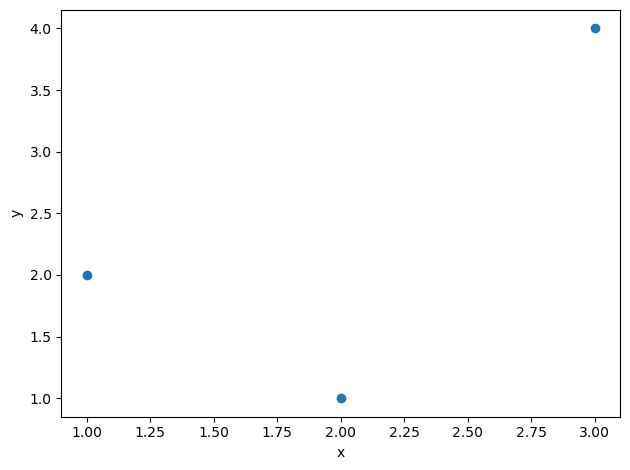

In [ ]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import matplotlib.pyplot as plt

sys.path.append(str(Path.cwd().resolve().parent / "src"))

from project_setup import get_project_root, make_paths, new_run_dir, save_data
from plotting import savefig

root = get_project_root()
paths = make_paths(root)
run_dir = new_run_dir(paths, label="week_2")

print(f"Project root: {paths.root}")
print(f"Run directory: {run_dir}")


In [ ]:
# Example: create and save a plot
fig, ax = plt.subplots()
ax.scatter([1, 2, 3], [2, 1, 4])
ax.set_xlabel("x")
ax.set_ylabel("y")

savefig(fig, run_dir, "scatter_test")
plt.close(fig)